In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import make_gaussian_quantiles

# Set the feature dimensionality
p = 2

# Construct the dataset
X, y = make_gaussian_quantiles(cov=3.,
                                 n_samples=1000, n_features=p,
                                 n_classes=2, random_state=1)

In [3]:
# get training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred))

The accuracy score of the SVC is: 0.6133333333333333


Classification Report:

               precision    recall  f1-score   support

           0       0.58      0.83      0.68       150
           1       0.70      0.39      0.50       150

    accuracy                           0.61       300
   macro avg       0.64      0.61      0.59       300
weighted avg       0.64      0.61      0.59       300



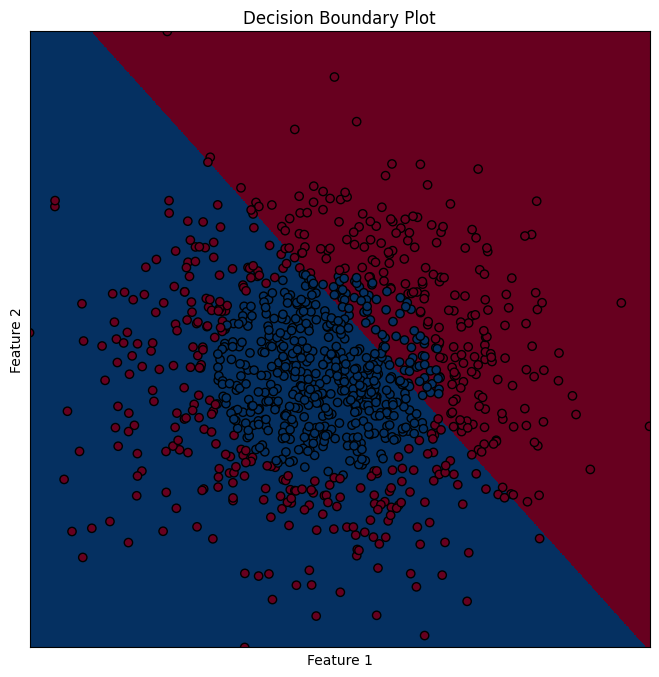

In [5]:
i = 0 # Feature 1
j = 1 # Feature 2

svc.fit(X[:, [i, j]], y)
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)

x_min, x_max = X[:, i].min(), X[:, i].max()
y_min, y_max = X[:, j].min(), X[:, j].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

y_hat = svc.predict(np.concatenate((xx.reshape(-1,1), yy.reshape(-1,1)), axis=1))
y_hat = y_hat.reshape(xx.shape)

ax1.pcolormesh(xx, yy, y_hat, cmap=plt.cm.get_cmap('RdBu_r'))
ax1.scatter(X[:, i], X[:, j], c=y, edgecolors='k', cmap=plt.cm.get_cmap('RdBu_r'))
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('Decision Boundary Plot')
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_xticks(())
ax1.set_yticks(())
plt.show()

In [7]:
#from the plot above data is not linearly seperable
# use non-linear decision boundary instead.
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n",classification_report(y_test, y_pred))


The accuracy score of the SVC is: 0.9833333333333333


Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.99      0.98       150
           1       0.99      0.98      0.98       150

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



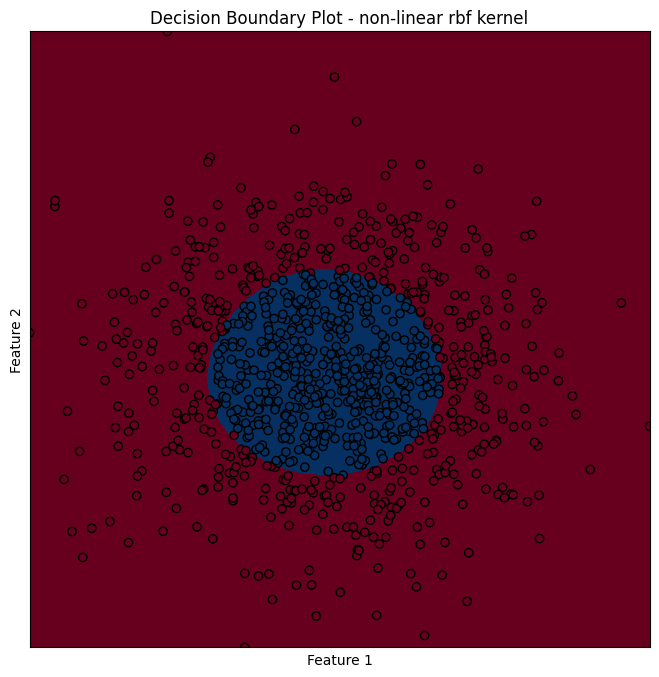

In [8]:
i = 0 # Feature 1
j = 1 # Feature 2

svc.fit(X[:, [i, j]], y)
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)

x_min, x_max = X[:, i].min(), X[:, i].max()
y_min, y_max = X[:, j].min(), X[:, j].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

y_hat = svc.predict(np.concatenate((xx.reshape(-1,1), yy.reshape(-1,1)), axis=1))
y_hat = y_hat.reshape(xx.shape)

ax1.pcolormesh(xx, yy, y_hat, cmap=plt.cm.get_cmap('RdBu_r'))
ax1.scatter(X[:, i], X[:, j], c=y, edgecolors='k', cmap=plt.cm.get_cmap('RdBu_r'))
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('Decision Boundary Plot - non-linear rbf kernel')
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_xticks(())
ax1.set_yticks(())
plt.show()

# Tuning the Model

In [9]:
parameters = {'kernel':('linear', 'rbf'),
              'C':(0.25,1.0),
              'gamma': (1,2)}

In [10]:
svm = SVC()
clf = GridSearchCV(svm, parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': (0.25, 1.0), 'gamma': (1, 2),
                         'kernel': ('linear', 'rbf')})

In [11]:
y_opt = clf.predict(X_test)
# Print accuracy scores for tuned and untuned models
print("Accuracy for untuned model: ", accuracy_score(y_test, y_pred))
print("Accuracy for tuned model: ", accuracy_score(y_test, y_opt))

Accuracy for untuned model:  0.9833333333333333
Accuracy for tuned model:  0.9666666666666667
